# matplotlib

## 目录
+ 一、【重点】Matplotlib基础知识

+ 二、设置plot的风格和样式
    + 1、【重点】点和线的样式
    + 2、X、Y轴坐标刻度


+ 三、2D图形
    + 1、示例
    + 2、【重点】直方图
    + 3、【重点】条形图
    + 4、【重点】饼图
    + 5、【重点】散点图
    
=============以上为重点=================

=============以下为了解部分 =============
+ 四、图形内的文字、注释、箭头
    + 1、图形内的文字
    + 2、注释
    + 3、箭头
    
+ 五、3D图
    + 1、曲面图

+ 六、玫瑰图

## 一、Matplotlib基础知识

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib中的基本图表包括的元素
+ x轴和y轴  axis
水平和垂直的轴线


+ 轴标签 axisLabel
水平和垂直的轴标签


+ x轴和y轴刻度  tick
刻度标示坐标轴的分隔，包括最小刻度和最大刻度


+ x轴和y轴刻度标签  tick label
表示特定坐标轴的值


+ 绘图区域（坐标系）  axes
实际绘图的区域


+ 画布 figure
呈现所有的坐标系

![](matplotlib图像组成.PNG)

[]

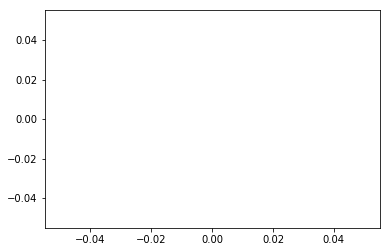

In [2]:
plt.plot()

### 只含单一曲线的图

1、可以使用多个plot函数（推荐），在一个图中绘制多个曲线

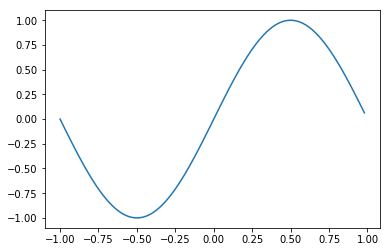

In [7]:
x = np.arange(-1, 1, step=0.02)
# y = x**2
plt.plot(x, np.sin(x*np.pi))

2、也可以在一个plot函数中传入多对X,Y值，在一个图中绘制多个曲线

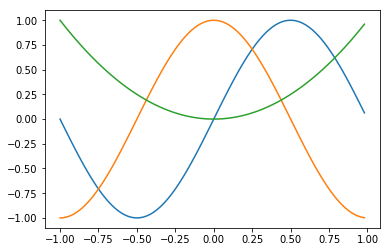

In [9]:
plt.plot(x, np.sin(x*np.pi), 
         x, np.cos(x*np.pi),
        x, x**2)

### 设置子画布

axes = plt.subplot()

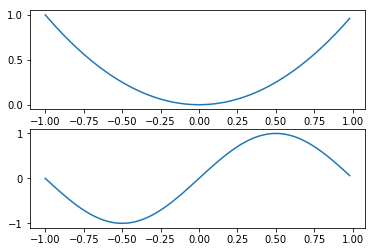

In [13]:
# 在2行1列的大画布下创建第一个子画布
axes1 = plt.subplot(2,1,1)  # 创建子画布,
axes1.plot(x, x**2)  

# 在2行1列的大画布下创建第2个子画布
axes2 = plt.subplot(2,1,2)
axes2.plot(x, np.sin(x*np.pi))

# 网格线
绘制正弦余弦

使用plt.grid方法可以开启网格线，使用plt面向对象的方法，创建多个子图显示不同网格线
![](1.PNG)

- lw代表linewidth，线的粗细
- alpha表示线的明暗程度
- color代表颜色
- axis显示轴向
    - both 显示 x和y方向的格子
    - x
    - y
- linestyle 线的样式
   
   linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]

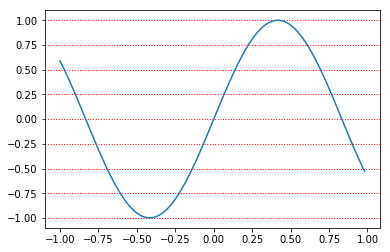

In [42]:
plt.plot(x, np.sin(1.2*np.pi*x))
plt.grid('on', 
         lw=1,
         alpha=1,
         color='red',
         axis='y',
         ls=':'
)  #打开画布的网格

### 坐标轴界限

plt.axis([xmin,xmax,ymin,ymax])

##### plt.axis('xxx') 'tight'、'off'、'equal'……

设置坐标轴类型  
关闭坐标轴

(-2.1975000000000002,
 2.147500000000004,
 -0.20000000000000001,
 4.2000000000000002)

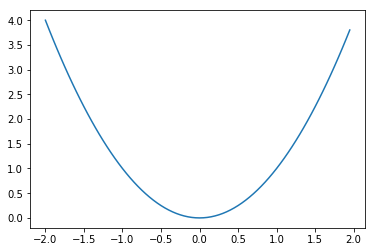

In [50]:
x = np.arange(-2,2, step=0.05)
plt.plot(x, x**2)
# plt.axis([-2, 2, 0, 4.5])
plt.axis('tight')

#### xlim方法和ylim方法

除了plt.axis方法，还可以通过xlim，ylim方法设置坐标轴范围

(-1.5, 1.5)

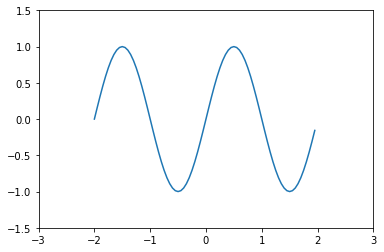

In [53]:
x = np.arange(-2,2, step=0.05)
plt.plot(x, np.sin(x*np.pi))
plt.xlim([-3, 3])
plt.ylim([-1.5, 1.5])

### 坐标轴标签
xlabel方法和ylabel方法  
plt.ylabel('y = x^2 + 5',rotation = 60)旋转

- color 标签颜色
- fontsize 字体大小
- rotation 旋转角度


In [55]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False # 负号编码

Text(0,0.5,'2017年各店销量')

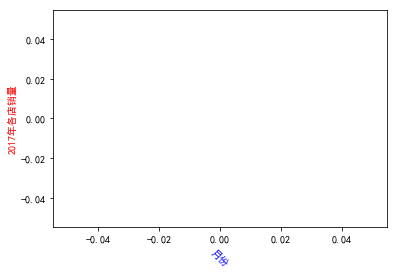

In [61]:
plt.plot()
plt.xlabel('月份', rotation=-45, color='b')
plt.ylabel('2017年各店销量', rotation=90, color='r')

### 标题
plt.title()方法

- loc {left,center,right}
- color 标签颜色
- fontsize 字体大小
- rotation 旋转角度

Text(0,1,'2017全年销量情况')

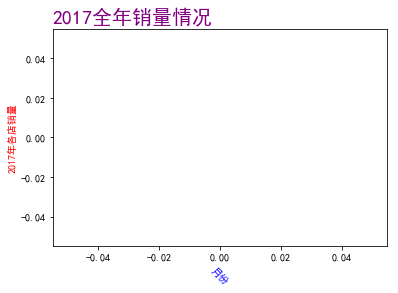

In [73]:
plt.plot()
plt.xlabel('月份', rotation=-45, color='b')
plt.ylabel('2017年各店销量', rotation=90, color='r')
plt.title('2017全年销量情况',
          loc='left',
          fontsize=20, color='purple', rotation=0)

### 图例

#### legend方法

两种传参方法：
- 分别在plot函数中增加label参数,再调用legend()方法显示
- 直接在legend方法中传入字符串列表legend(['slow','normal','fast'])


### loc参数

- loc参数用于设置图例标签的位置，一般在legend函数内
- matplotlib已经预定义好几种数字表示的位置

| 字符串       | 数值      | 字符串   |  数值 |
| :-------------: |:-----------:| :-----:|  :-----:|
| best        |  0        | center left   |   6 |
| upper right    | 1        | center right  |   7  |
| upper left    |  2        | lower center  |   8  |
| lower left    |  3        | upper center  |   9 |
| lower right   |  4        | center      |   10 |
| right       |  5        |

loc参数可以是2元素的元组，表示图例左下角的坐标

- [0,0] 左下
- [0,1] 左上
- [1,0] 右下
- [1,1] 右上
     - 可以是小数，建议在[0, 1]区间，如果超过则显示在画布的外边

图例也可以超过图的界限loc = (-0.1,0.9)

### ncol参数
ncol控制图例中有几列,在legend中设置ncol,需要设置loc

### linestyle、color、marker
修改线条样式  
- marker
    -  markersize 
    -  markeredgecolor
    -  markerfacecolor

In [85]:
df = DataFrame(np.random.randint(1, 100, size=(3,5))
              ,columns=('A', 'B', 'C', 'D', 'E'))

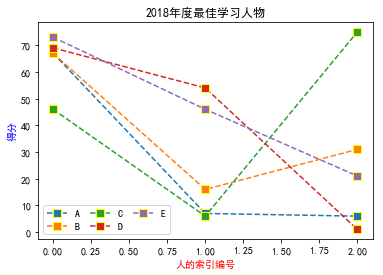

In [121]:
plt.plot(df, ls='--',
         marker='s',
         markersize=8,
         markeredgecolor='yellow')  # linestyle
plt.xlabel('人的索引编号', color='red')
plt.ylabel('得分', color='blue')
plt.title('2018年度最佳学习人物')
plt.legend(df, ncol=3,
           columnspacing=1)
plt.show()

### 保存图片

使用figure对象的savefig的函数
+ filename  
含有文件路径的字符串或Python的文件型对象。图像格式由文件扩展名推断得出，例如，.pdf推断出PDF，.png推断出PNG
（“png”、“pdf”、“svg”、“ps”、“eps”……）
+ dpi  
图像分辨率（每英寸点数），默认为100
+ facecolor  
图像的背景色，默认为“w”（白色） 

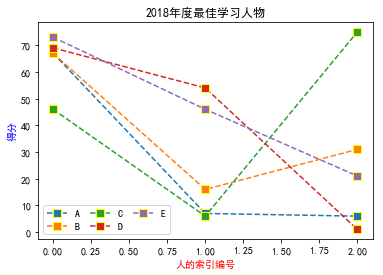

In [124]:
plt.plot(df, ls='--',
         marker='s',
         markersize=8,
         markeredgecolor='yellow')  # linestyle
plt.xlabel('人的索引编号', color='red')
plt.ylabel('得分', color='blue')
plt.title('2018年度最佳学习人物')
plt.legend(df, ncol=3,
           columnspacing=1)

# 保存图片或pdf文件
plt.savefig('p.pdf',dpi=320, facecolor='c')

累加求和 : ndarray.cumsum(axis=None)

假如： arr 为三维数据(3, 2, 3)

axis = 0, 拿出每个二维数进行累加

axis = 1, 拿出每个二维的每一个维数据累加

axis = 2, 拿出每一个二维的每个一维的各个数累

In [125]:
arr = np.array(
[ 
   [
         [1, 2, 3],
         [4, 5, 6]
   ],
   [
         [7, 8, 9],
         [10, 11, 12]
   ],
   [
         [13, 14, 15],
         [16, 17, 18]
   ]
])

In [126]:
# 累加之后结果，维度不变
arr.cumsum(axis=0)  # 跨二维数组的累加

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 8, 10, 12],
        [14, 16, 18]],

       [[21, 24, 27],
        [30, 33, 36]]])

In [127]:
arr.cumsum(axis=1)  # 将每个二维中每一维中对应的位置元素累加

array([[[ 1,  2,  3],
        [ 5,  7,  9]],

       [[ 7,  8,  9],
        [17, 19, 21]],

       [[13, 14, 15],
        [29, 31, 33]]])

In [128]:
arr.cumsum(axis=2)

array([[[ 1,  3,  6],
        [ 4,  9, 15]],

       [[ 7, 15, 24],
        [10, 21, 33]],

       [[13, 27, 42],
        [16, 33, 51]]])

## 二、设置plot的风格和样式
plot语句中支持除X,Y以外的参数，以字符串形式存在，来控制颜色、线型、点型等要素，语法形式为：  
plt.plot(X, Y, 'format', ...) 

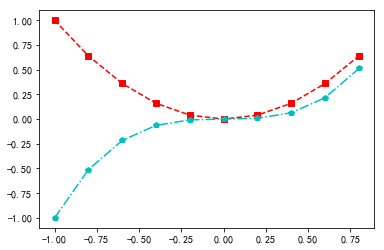

In [135]:
x = np.arange(-1, 1, step=0.2)
# plot()返回对应数量的画布对象
a1, a2 = plt.plot(x, x**2,'r--s', x, x**3, 'c-.p')
plt.show()

#### 颜色
参数color或c

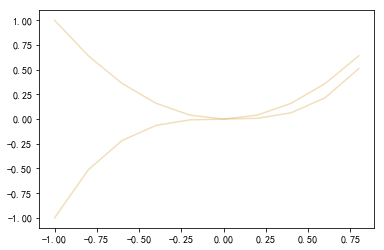

In [151]:
# 颜色格式: red/r 颜色名, #RRGGBB 格式
# #RRGGBBAA AA是alpha的16进制表示(00~FF)(0-255)
plt.plot(x, x**2, x, x**3, c='#cc880044')

##### 颜色值的方式
+ 别名
    + color='r'
    
    
    
+ 合法的HTML颜色名
    + color = 'red'

| 颜色       | 别名      | HTML颜色名  | 颜色   |  别名 |HTML颜色名|
| :-------------: |:---------:|:-----------:| :------:|  :-----:| :-----:|
| 蓝色        | b       | blue      | 绿色   |  g   |  green  |
| 红色        | r       | red      | 黄色    |  y   |  yellow |
| 青色        | c       | cyan      | 黑色   |  k   |  black  |
| 洋红色      | m        | magenta    | 白色   |  w   |  white  |






+ HTML十六进制字符串
    + color = '#eeefff'
    + color = '#eeefffff'  rgba格式，每个颜色占两位




+ 归一化到[0, 1]的RGB元组
    + color = (0.3, 0.3, 0.4)


+ jpg png 区别

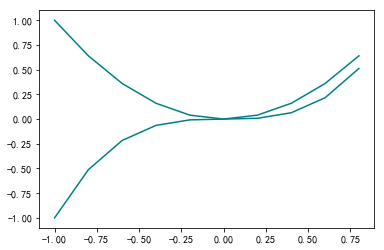

In [157]:
plt.plot(x, x**2, x, x**3, c=(0, 0.5, 0.5))

##### 透明度
alpha参数 

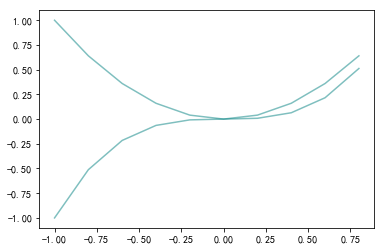

In [158]:
plt.plot(x, x**2, x, x**3,
         c=(0, 0.5, 0.5),
         alpha=0.5)

##### 背景色
设置背景色，通过plt.subplot()方法传入facecolor参数，来设置坐标系的背景色

In [160]:
x = arr.cumsum()

In [161]:
x

array([  1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,  91,
       105, 120, 136, 153, 171])

(1, 20)

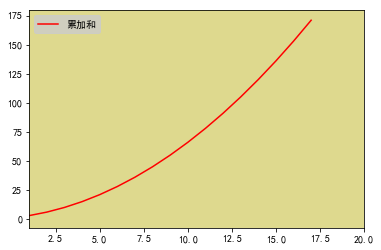

In [176]:
# ?修改legend的字体颜色 
x = arr.cumsum()
axes = plt.subplot(facecolor='#c8c04499')
axes.plot(x, c='r')
axes.legend(['累加和'],
            facecolor=(0.8, 0.8, 0.8))
axes.set_xlim([1, 20]) # 设置子画布的x刻度范围

#### 线型
参数linestyle或ls

| 线条风格     | 描述      | 线条风格 |  描述 |
| :-------------: |:------------:| :----:|  :-----:|
| '-'        | 实线     | ':'     |  虚线 |
| '--'       | 破折线    | 'steps'  |  阶梯线 |
| '-.'       | 点划线    | 'None' / '，' |  什么都不画 |

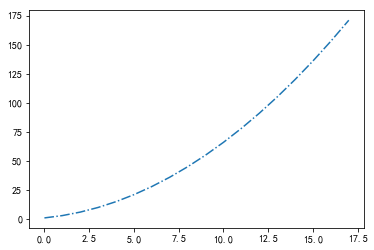

In [183]:
plt.plot(x, ls='dashdot')

##### 线宽
linewidth或lw参数

##### 不同宽度的破折线
dashes参数    eg.dashes = [20,50,5,2,10,5]


设置破折号序列各段的宽度  
![](5.png)

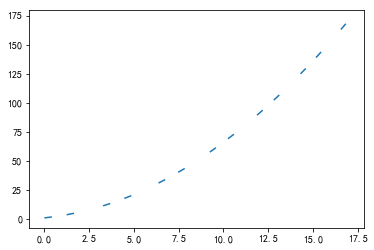

In [190]:
# 偶数成队，第一个数段的长度，第二个数是段的间隔
plt.plot(x, dashes=[5, 10, 5, 20]) 

扩展

数据库的五种约束：

- 主键 primary key
- 外键 foreign key
- 唯一 unique
- 非空 not null
- 检查 check  / default 默认值,  
    MySQL不支持check, Oracle/SQLServer支持

#### 点型
- marker 设置点形
- markersize 设置点形大小

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| '1'         | 一角朝下的三脚架      | '3'     |  一角朝左的三脚架 |
| '2'         | 一角朝上的三脚架      | '4'     |  一角朝右的三脚架 |

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| 's'         | 正方形   | 'p'   | 五边形     | 
| 'h'         | 六边形1    | 'H'     | 六边形2    |
| '8'         | 八边形     | 

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| '.'     |  点 | 'x'   | X   |
| '\*'    |  星号  | '+'         | 加号       |
| ','         | 像素       |

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| 'o'         | 圆圈      | 'D'         | 菱形      |
| 'd'    |  小菱形  |'','None',' ',None| 无       | 

| 标记     | 描述     | 标记   |  描述 |
| :--------: |:----------:| :------:| :----:|
| '\_'     |  水平线    | '&#124;'     |  竖线   
![](6.png)

| 标记        | 描述       | 标记   |  描述 |
| :-------------: |:-----------:| :----:|  :-----:|
| 'v'         | 一角朝下的三角形 | '<'     |  一角朝左的三角形 |
| '^'         | 一角朝上的三角形 | '>'     |  一角朝右的三角形 |

#### 多参数连用
颜色、点型、线型，可以把几种参数写在一个字符串内进行设置 'r-.o'

#### 更多点和线的设置

- markeredgecolor = 'green',
- markeredgewidth = 2,
- markerfacecolor = 'purple'

| 参数        | 描述       | 参数       |  描述   |
| :-------------: |:-----------:| :-------------:|  :------:|
| color或c      | 线的颜色   | linestyle或ls  |  线型   |
| linewidth或lw   | 线宽     | marker       |  点型  |
| markeredgecolor  | 点边缘的颜色 | markeredgewidth | 点边缘的宽度 |
| markerfacecolor  | 点内部的颜色 | markersize    |  点的大小    |  
![](7.png)

#### 在一条语句中为多个曲线进行设置

##### 多个曲线同一设置
属性名声明，不可以多参数连用

plt.plot(x1, y1, x2, y2, fmt, ...)

##### 多个曲线不同设置
多个都进行设置时，多参数连用
plt.plot(x1, y1, fmt1, x2, y2, fmt2, ...)

#### 三种设置方式

##### 向方法传入关键字参数

- import matplotlib as mpl

##### 对实例使用一系列的setter方法

- plt.plot()方法返回一个包含所有线的列表，设置每一个线需要获取该线对象
    - eg: lines = plt.plot();   line = lines[0]
    - line.set_linewith()
    - line.set_linestyle()
    - line.set_color()
    
##### 对坐标系使用一系列的setter方法
- axes = plt.subplot()获取坐标系
    - set_title()
    - set_facecolor()
    - set_xticks、set_yticks 设置刻度值
    - set_xticklabels、set_yticklabels  设置刻度名称

<class 'matplotlib.text.Text'>


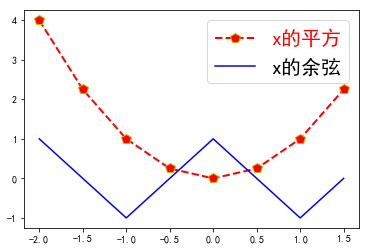

In [216]:
x = np.arange(-2, 2, step=0.5)
axes = plt.subplot()
# plot() 返回线的对象
lines = axes.plot(x, x**2, x, np.cos(x*np.pi))
lines[0].set_color('red')
lines[0].set_linewidth(5)
lines[0].set_marker('p')
lines[0].set_markersize(10) # 点型的大小
lines[0].set_markeredgecolor('y')
lines[0].set_linestyle('--') # 线的样式

lines[1].set_color('blue')
lines[0].set_linewidth(2)

leg = axes.legend(['x的平方', 'x的余弦'],
                  prop={'size':20, 'weight':'bold'})
texts = leg.get_texts()
texts[0].set_color('r')
plt.show()

### X、Y轴坐标刻度
plt.xticks()和plt.yticks()方法  

- 需指定刻度值和刻度名称  plt.xticks([刻度列表],[名称列表])
- 支持fontsize、rotation、color等参数设置
![](8.png)

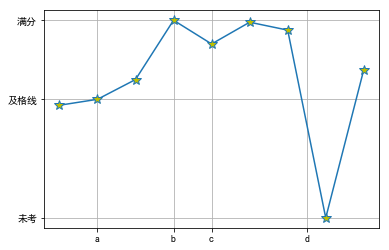

In [232]:
figure = plt.figure(facecolor='#c42836', frameon=False)
# add_subplot(rows,cols,number)  
axes = figure.add_subplot(111) # 在figure图形中添加了一个子画布

x = [57, 60, 70, 100, 88, 99, 95, 0, 75]
axes.plot(Series(x), marker='*',
          markersize=10,
          markerfacecolor='y')
# 设置x坐标轴的刻度tick
# 设置x坐标轴的刻度对应的标题
axes.set_xticks([1, 3, 4, 6.5])
axes.set_xticklabels(['a', 'b', 'c', 'd'])

axes.set_yticks([0, 60, 100])
axes.set_yticklabels(['未考', '及格线', '满分'])
axes.grid()

plt.show()

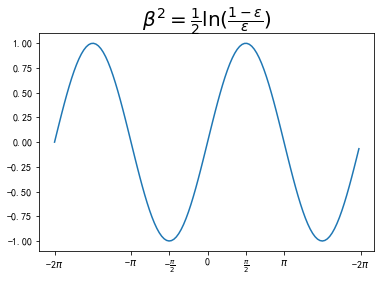

In [271]:
# 应用LaTex语法，显示数学的公式
x = np.arange(-2*np.pi, 2*np.pi, step=0.1)
axes = plt.subplot(111)
axes.plot(x, np.sin(x))

axes.set_xticks([-2*np.pi, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi])
axes.set_xticklabels([r'-2$\pi$',
                      r'-$\pi$',
                      r'-$\frac{\pi}{2}$',
                      '0',
                      r'$\frac{\pi}{2}$',
                      r'$\pi$',
                      r'-2$\pi$'])

# axes.set_title('$sin(x^2+log_{2^3}64)$',
# axes.set_title(r'$\sqrt[2]{\frac{\sum_{i=1}^n(x-E)^2}{N}}$',
# axes.set_title(r'$\int_{-1}^{1}\sqrt{1-x^2} dx$',
axes.set_title(r'$\beta^2 =\frac{1}{2}\ln(\frac{1-\epsilon}{\epsilon })$',
               fontdict={'fontsize': 20, 
                         'weight':'bold'})
plt.show()

In [ ]:
# figure 是 根画布 
# 获取根画布， 并设置相关的属性
fig = plt.figure(facecolor='purple', frameon=False) 

# 创建一个子画布
axes1 = fig.add_subplot(111)  # plt.subplot() 相同的

x = [9, 10, 5, 3, 11, 8]
axes1.plot(Series(x))
# axes1.set_xticks(range(len(x)))

# 在x坐标轴刻度的范围选择显示哪些刻度
#axes1.set_xticks([1, 3, 5]) 
# axes1.set_xticklabels(['a', 'b', 'c'])
axes1.set_xticklabels(list('Oabcdef'))

axes1.set_yticks([0, np.pi, 2*np.pi, np.pi**2])

# y轴的刻度是values值的范围， 等值设置刻度
axes1.set_yticklabels(['0', r'$\pi$', r'$2\pi$',r'$\pi^2$'],
                     fontsize=18, rotation=45, color='r')

# 设置标题
# axes1.set_title(r'$x^{2^n}$', fontsize=20)
# axes1.set_title(r'$\sqrt[3]{(\frac{1}{2})^2+(\frac{1}{3})^2}$', 
#                 fontsize=20, loc='left')
axes1.set_title(r'$\int_a^b f(x)\,dx$', 
                fontsize=20, loc='left')


#### 正弦余弦
LaTex语法，用$\pi$、$\sigma$等表达式在图表上写上希腊字母  

In [ ]:
x = np.linspace(-np.pi, np.pi, 1000)
plt.plot(x, np.sin(x), x, np.cos(x))
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
           [r'$-\pi$', r'$-\frac{\pi}{2}$',
            '0', r'$\frac{\pi}{2}$', r'$\pi$'],
           fontsize=20, color='blue', rotation=30)
plt.show()

## 三、2D图形

### 直方图

【直方图的参数只有一个x！！！不像条形图需要传入x,y】

hist()的参数
+ bins  
可以是一个bin数量的整数值，也可以是表示bin的一个序列。默认值为10
+ normed  
如果值为True，直方图的值将进行归一化处理，形成概率密度，默认值为False
+ color  
指定直方图的颜色。可以是单一颜色值或颜色的序列。如果指定了多个数据集合，颜色序列将会设置为相同的顺序。如果未指定，将会使用一个默认的线条颜色
+ orientation  
通过设置orientation为horizontal创建水平直方图。默认值为vertical

100

101

<a list of 100 Patch objects>

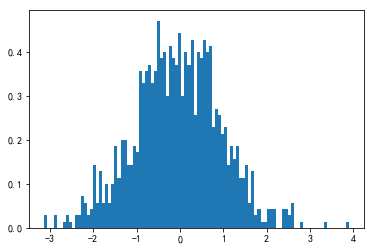

In [283]:
x = np.random.randn(1000)
# bins 表示柱子数量， 每个柱子代表某两个数之间的数量
# hist() 返回两个ndarray的数组 和 相应数量柱子的对象
# 第一个数组 每个柱子的数量值
# 第二个数组 ， 每个柱子数量值的区间
# normed = True 归一化处理， 将数量转成 (0,1)之间的数
a1,a2,bar = plt.hist(x, bins=100, normed=True,
         orientation='vertical')  # vertical, horizontal
display(a1.size, a2.size, bar)
plt.show()

### 条形图

【条形图有两个参数x,y】

- width 纵向设置条形宽度
- height 横向设置条形高度

bar()、barh()

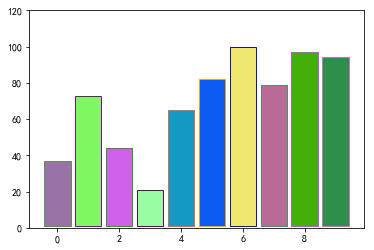

In [291]:
import random

# x 索引（刻度）
x = np.arange(0,10,1) # [0, 1, 2, ..., 9]

# y 轴的数值
height = np.random.randint(1,100, size=10)

# 颜色值： [0-255], [0, 1] ,
# 一个完整的颜色的表示: (255, 255, 255) 或 (1, 1, 1) 或 '#ffffff'
# 生成10个随机颜色
colors = [np.random.random(size=3) for _ in x]
# colors生成了二维数组 [array([0.22, 0.01, 0.77]),
#                    array([]), ]

# 边缘的颜色 与 柱子的颜色相反
edgecolors = 1 - np.array(colors) 

plt.bar(x, height,
        color=colors,
        edgecolor=edgecolors,
        width=0.85,  # 宽度比例
        bottom=1) # 相对于 y 轴的刻度值
plt.ylim([0, 120])  # y轴的刻度范围(ymin, ymax)
plt.show()

<Container object of 10 artists>

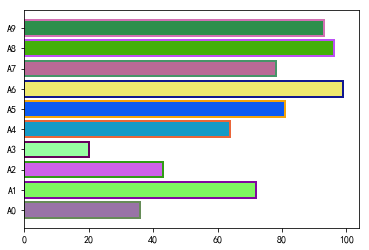

In [318]:
ticklabes = ['A'+str(_) for _ in x]

# 水平的柱状图
plt.barh(x, height,
         color=colors,
         edgecolor=edgecolors,
         tick_label=ticklabes,
         height=0.78,  # 设置每个柱子的间隔大小, 高度比例
         linewidth=2)

### 饼图

【饼图也只有一个参数x！】

pie()  
饼图适合展示各部分占总体的比例，条形图适合比较各部分的大小

普通各部分占满饼图

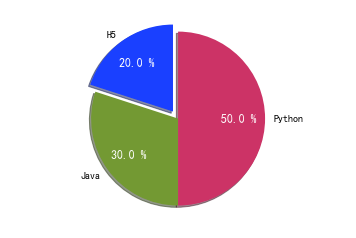

In [341]:
plt.axis('equal')  # 坐标轴等比例显示

x = [20, 30, 50] # 等比例数值，按百分比
# 返回3个列表的元组
# 第一个列表是[Wedge, ..., Wedeg] 子饼图对象
# 第二个列表是[Text, ... Text] 每一个子饼图的标签名称的Text对象
# 第三个列表是[Text, ..., Text] 每个子饼图的百分比的Text对象
wedges, labels, pctlabels = plt.pie(x, labels=['H5', 'Java', 'Python'],
        startangle=90,
        colors=[(0.1,0.25, 1), 
               (0.45, 0.6, 0.2),
               (0.8, 0.2, 0.4)],
        shadow=True,
        explode=[0.1, 0, 0],  # 分离（偏移圆心位置）
        labeldistance=1.1,
        autopct='%.1f %%', # 显示百分比的数值, 
        pctdistance=0.7 , # 百分比的数值文本与圆心的位置
       )
# 修改百分比文本颜色
for text in pctlabels:
    text.set_color('white')
    text.set_fontsize(12)
plt.show()

普通未占满饼图

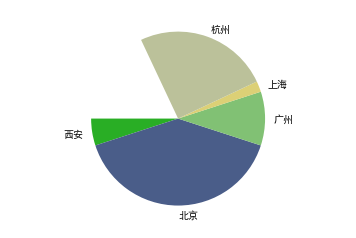

In [342]:
plt.axis('equal')
plt.rcParams['font.sans-serif'] = ['SimHei']
x = [0.05, 0.4, 0.1, 0.02, 0.25] # 百分比， 累计不超过 1 
colors = np.array([ np.random.random(size=3) for _ in  x])
plt.pie(x,
        labels=['西安', '北京', '广州', '上海', '杭州'],
       colors=colors, startangle=180)
plt.show()

饼图阴影、分裂等属性设置
- labels参数设置每一块的标签；
- labeldistance参数设置标签距离圆心的距离（比例值,只能设置一个浮点小数）
- autopct参数设置比例值的显示格式(%1.1f%%)；
- pctdistance参数设置比例值文字距离圆心的距离
- explode参数设置每一块顶点距圆心的长度（比例值,列表）；
- colors参数设置每一块的颜色（列表）；
- shadow参数为布尔值，设置是否绘制阴影
- startangle参数设置饼图起始角度

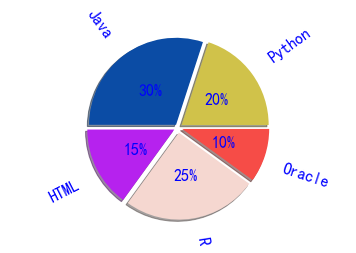

In [343]:
x = [0.2, 0.3, 0.15, 0.25, 0.1]
labels = ['Python', 'Java', 'HTML', 'R', 'Oracle']

colors = np.array([ np.random.random(size=3) for _ in  x])
plt.axis('equal')
plt.pie(x,
        labels=labels,
        labeldistance=1.2,
        autopct='%.f%%',
        pctdistance=0.5,
        colors= colors,
        explode= np.random.uniform(0.01, 0.08, size=(len(x))),
        shadow=True,
        textprops={'color':'blue',
                   'fontsize': 16},
        rotatelabels=True  # 将标签按Wedge的角度旋转
    )

plt.show()

### 散点图

【散点图需要两个参数x,y，但此时x不是表示x轴的刻度，而是每个点的横坐标！】

scatter()  
![](10.png)

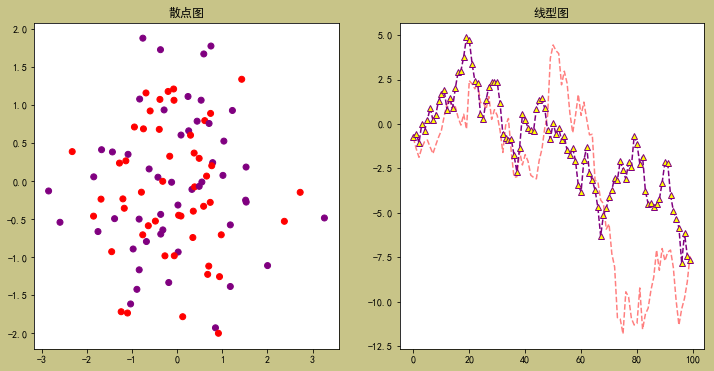

In [348]:
plt.rcParams['axes.unicode_minus'] = False
x = np.random.randn(100)
y = np.random.randn(100)

fig = plt.figure(facecolor='#c8c488', figsize=(12, 6))

# 生成一个子画布
axes1 = fig.add_subplot(121)  # 一行的第一列
axes1.scatter(x, y, color=['r', 'purple'])
axes1.set_title('散点图')

axes2 = fig.add_subplot(122) # 一行的第二列

# plot()返回线的对象
line1, line2 = axes2.plot(x.cumsum(),
                          'r--', y.cumsum(), 'b^')
axes2.set_title('线型图')

line1.set_alpha(0.5)
# 修改第二条线的样式
line2.set_c('purple') # color
line2.set_ls('--')  # linestyle  线样式
line2.set_marker('^')  # 点的形状
line2.set_markerfacecolor('yellow')  # 点形状填充的颜色

plt.show()


## <font color = red>四、图形内的文字、注释、箭头(自学)</font>

控制文字属性的方法:  


| pyplot函数     | API方法                | 描述                     |
| :-------------: |:------------------------------:| :---------------------------------:|
| text()       |  mpl.axes.Axes.text()       | 在Axes对象的任意位置添加文字     |
| xlabel()      |  mpl.axes.Axes.set_xlabel()   | 为X轴添加标签               |
| ylabel()      |  mpl.axes.Axes.set_ylabel()   | 为Y轴添加标签               |
| title()       | mpl.axes.Axes.set_title()   |  为Axes对象添加标题            |
| legend()      | mpl.axes.Axes.legend()      |  为Axes对象添加图例            |
| figtext()     |  mpl.figure.Figure.text()    |  在Figure对象的任意位置添加文字    |
| suptitle()     | mpl.figure.Figure.suptitle() |  为Figure对象添加中心化的标题     |
| annnotate()    |  mpl.axes.Axes.annotate()    |  为Axes对象添加注释（箭头可选）    |  


所有的方法会返回一个matplotlib.text.Text对象

### 图形内的文字
text()  
![](14.png)

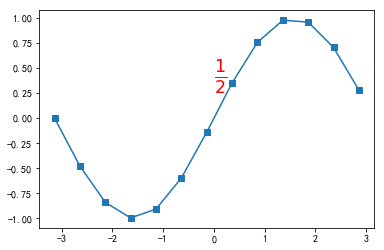

In [364]:
x = np.arange(-np.pi, np.pi, step=0.5)
y = np.sin(x)
plt.plot(x, y, marker='s')

# 在画布内(axes坐标系内)任意位置绘制文本
# fontdict 根据matplotlib.font_manager.FontProperties类的属性设置
plt.text(0, 0.35, r'$\frac{1}{2}$',
         fontdict=dict(color='r',
                       fontsize=25,
                       style='italic',
                       weight='bold'))

plt.show()

In [365]:
def aa(**kwargs):
    return kwargs

In [366]:
print(aa(a='123', b='456', c=1199))

{'a': '123', 'b': '456', 'c': 1199}


### 注释
annotate()
- xy参数设置箭头指示的位置
- xytext参数设置注释文字的位置  
- arrowprops参数以字典的形式设置箭头的样式  
    - width参数设置箭头长方形部分的宽度
    - headlength参数设置箭头尖端的长度，  
    - headwidth参数设置箭头尖端底部的宽度
    - shrink参数设置箭头顶点、尾部与指示点、注释文字的距离（比例值），可以理解为控制箭头的长度

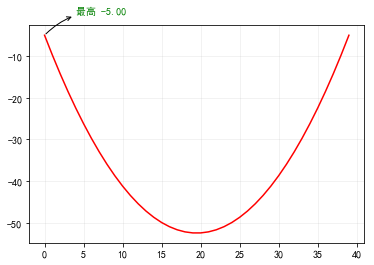

In [391]:
x= np.arange(-5, 5, step=0.25)

a = x.cumsum()
axes = plt.subplot(111)

axes.plot(a, 'r')
axes.grid('on', alpha=0.2)

# arrowprops 中
# 如果使用arrowstyle 则不能再设置其它的属性
# 反之，可以设置width, headlength, headwdith
# color 字体颜色
# facecolor 箭头的填充颜色
# connstyles=["arc", "arc,angleA=10, armA=30,rad=30", "arc3,rad=.2", "arc3, rad=-.2", "angle", "angle3"]
axes.annotate('最高 %.2f' % a.max(),
             xytext=(4, a.max()+5),
             xy=(0, a.max()),
             color='g',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=.2')
#              arrowprops=dict(width=5, 
#                              headlength=8,
#                              facecolor='yellow',
#                              headwidth=10)
             )

plt.show()

In [256]:
# 查看ndarray的最大数的位置
a.argmax()

51

    如下都是arrowstyle可以选择的风格样式
    
    ``'->'``       head_length=0.4,head_width=0.2
    ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
    ``'|-|'``      widthA=1.0,widthB=1.0
    ``'-|>'``      head_length=0.4,head_width=0.2
    ``'<-'``       head_length=0.4,head_width=0.2
    ``'<->'``      head_length=0.4,head_width=0.2
    ``'<|-'``      head_length=0.4,head_width=0.2
    ``'<|-|>'``    head_length=0.4,head_width=0.2
    ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
    ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
    ``'wedge'``    tail_width=0.3,shrink_factor=0.5


练习  
三个随机正太分布数据
![](16.png)  

## <font color = red>五、3D图(自学)</font>

#### 曲面图  
![](11.png)

导包  
- from mpl_toolkits.mplot3d.axes3d import Axes3D

使用meshgrid函数切割x,y轴, 生成“格点”矩阵的曲面的分格线坐标。
- X,Y = np.meshgrid(x, y) 

创建生成Z的函数
- return sin(X)+cos(Y)
- return 2+a-2*cos(X)*cos(Y)-a*cos(b-2*Y)
    - a = 0.7系数， b= pi

创建3d坐标系
- axes = plt.subplot(projection='3d')


绘制3d图形
- p = axes.plot_surface(X,Y,Z,color='red',cmap='summer',rstride=5,cstride=5)
- cmap 是曲面映射的颜色
- rstride 表示行的步幅
- cstride 表示列的步幅
- antialiased 抗锯齿，平滑

添加colorbar
- plt.colorbar(p,shrink=0.5)
- shrink 为缩放比例

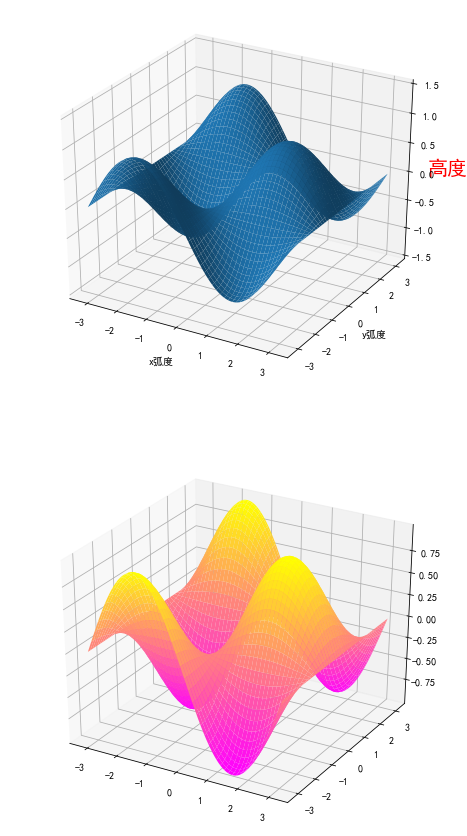

In [254]:

x = y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)  # 转成“格点”曲面矩阵的坐标
Z = (lambda x,y: np.sin(x)*np.cos(y) )(X, Y)  # Z=f(X,Y)

fig = plt.figure(figsize=(8, 15))

# 设置图形显示为3d
axes1 = plt.subplot(211, projection='3d')
axes2 = plt.subplot(212, projection='3d')

axes1.set_zlim([-1.5, 1.5])  # 设置Z轴刻度
axes1.set_zlabel('高度', fontdict=dict(fontsize=20, color='red'))
axes1.set_ylabel('y弧度')
axes1.set_xlabel('x弧度')

axes1.plot_surface(X, Y, Z)
axes2.plot_surface(X, Y, Z, cmap='spring', rstride=2, cstride=2)

plt.show()

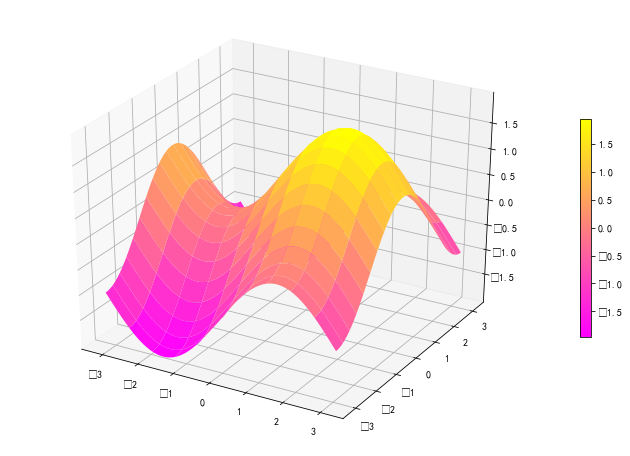

In [141]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.figure(figsize=(12,8))
axes = plt.subplot(projection='3d')

x = np.linspace(-np.pi,np.pi,100)
y = np.linspace(-np.pi,np.pi,100)
XX,YY = np.meshgrid(x, y)

def creat_Z(XX, YY):
    return np.sin(XX) + np.cos(YY)

ZZ = creat_Z(XX,YY)

# 
p = axes.plot_surface(XX,YY,ZZ,
                      color='#ff00aa',
                      cmap='spring',
                      rstride=5,cstride=10)

plt.colorbar(p,shrink=0.5)

## <font color = red>玫瑰图/极坐标条形图(自学)</font>  
![](13.png)

创建极坐标，设置polar属性
- plt.axes(polar = True)

绘制极坐标条形图
- index = np.arange(-np.pi,np.pi,2*np.pi/6)
- plt.bar(x=index ,height = [1,2,3,4,5,6] ,width = 2*np.pi/6)

<Container object of 5 artists>

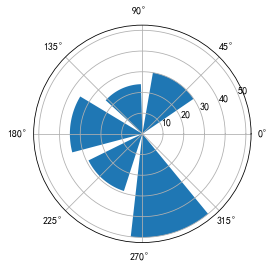

In [259]:
plt.axes(polar=True)

index = [1,2,3,4,5]
height = [30,24,35,29,50]
plt.bar(x=index,height=height,width=0.8)